STAGE 3


___________________________________________________________________________

In [1]:
import numpy as np
import pandas as pd
df_1=pd.read_csv('hotel_booking.csv')
df_2= df_1.drop("company", axis='columns')
df_3= df_2.drop("reservation_status", axis = 1)
df4=df_3.dropna()

In [2]:
df=df4.sample(n=60000, random_state=42)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 114611 to 26284
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           60000 non-null  object 
 1   is_canceled                     60000 non-null  int64  
 2   lead_time                       60000 non-null  int64  
 3   arrival_date_year               60000 non-null  int64  
 4   arrival_date_month              60000 non-null  object 
 5   arrival_date_week_number        60000 non-null  int64  
 6   arrival_date_day_of_month       60000 non-null  int64  
 7   stays_in_weekend_nights         60000 non-null  int64  
 8   stays_in_week_nights            60000 non-null  int64  
 9   adults                          60000 non-null  int64  
 10  children                        60000 non-null  float64
 11  babies                          60000 non-null  int64  
 12  meal                       

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

#x_standrized=full_pipeline.fit_transform(x)



In [5]:
y = df["is_canceled"]
x = df.drop("is_canceled", axis=1)
categorical_features = x.select_dtypes(include="object").columns
integer_features = x.select_dtypes(exclude="object").columns
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), integer_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])
#train_raw, test_raw, target, target_test = train_test_split(x,y, test_size=0.2, stratify= y, random_state=0)

In [6]:
split=5
df_size=df.shape[0]
fold_size = df.shape[0]/split
coef_cv=np.zeros((5,df_size))
for i in range(split):
    test_index = np.arange(i*fold_size, i*fold_size+fold_size,1)
    train_index = np.setdiff1d(np.arange(0,df.shape[0],1),test_index)
#.  debug
#   print(test_index)
#    print(train_index)
    train_raw = x.iloc[train_index]
    train_target_raw = y.iloc[train_index]
    test_raw = x.iloc[test_index]
    test_target_raw = y.iloc[test_index]
    #pipeline
    train = full_pipeline.fit_transform(train_raw)
    test = full_pipeline.transform(test_raw)
    train_target = train_target_raw.to_numpy()
    test_target = test_target_raw.to_numpy()
    lin_clf = LinearRegression()
    lin_clf.fit(train,train_target)
    predict1 = lin_clf.predict(test)
    predict2 = np.zeros(predict1.shape[0])
    for j in range(predict2.shape[0]):
        if (predict1[j]<0.5):
            predict2[j]=0
        else:
            predict2[j]=1
    #print(metrics.accuracy_score(test_target,predict2))
    #print(lin_clf.coef_.shape[0])
    #print(lin_clf.coef_)
    #new_array = np.array(lin_clf.coef_)
    coef_cv[i,:lin_clf.coef_.shape[0]]=np.array(lin_clf.coef_)
    print("In "+ str(i+1)  + " fold, the accuracy is "+ str(metrics.accuracy_score(test_target,predict2)))
    
    

In 1 fold, the accuracy is 0.88725
In 2 fold, the accuracy is 0.8805
In 3 fold, the accuracy is 0.8830833333333333
In 4 fold, the accuracy is 0.8825833333333334
In 5 fold, the accuracy is 0.8851666666666667


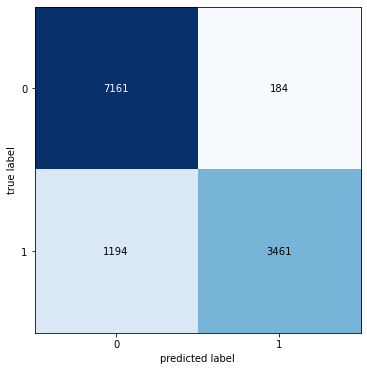

In [7]:
#BEST MODEL
#
#
#
i=0
train_raw = x.iloc[train_index]
train_target_raw = y.iloc[train_index]
test_raw = x.iloc[test_index]
test_target_raw = y.iloc[test_index]
#pipeline
train = full_pipeline.fit_transform(train_raw)
test = full_pipeline.transform(test_raw)
train_target = train_target_raw.to_numpy()
test_target = test_target_raw.to_numpy()
lin_clf = LinearRegression()
lin_clf.fit(train,train_target)
predict1 = lin_clf.predict(test)
predict2 = np.zeros(predict1.shape[0])
for j in range(predict2.shape[0]):
        if (predict1[j]<0.5):
            predict2[j]=0
        else:
            predict2[j]=1
cm = confusion_matrix(test_target, predict2)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6))

In [12]:
df_fe = df
df_fe['Total_person'] = df_fe['adults'] + df_fe['children']
df_fe['stays_total_days'] = df_fe['stays_in_weekend_nights'] + df_fe['stays_in_week_nights']
df['success_rate'] = np.where((df['previous_cancellations'] + df['previous_bookings_not_canceled'])== 0, 0, df['previous_bookings_not_canceled'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled']))

In [16]:
df_fe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Total_person,stats_total_days,success_rate
114611,City Hotel,0,149,2017,June,25,24,0,1,2,...,495.0,0,Transient-Party,154.00,0,0,2017-06-25,2.0,1,0.0
35429,Resort Hotel,0,6,2017,April,16,19,0,3,2,...,240.0,0,Transient,128.00,0,1,2017-04-22,2.0,3,0.0
25024,Resort Hotel,0,93,2016,June,24,10,0,2,3,...,240.0,0,Transient-Party,166.00,0,0,2016-06-12,3.0,2,0.0
64893,City Hotel,1,31,2017,March,12,19,2,3,1,...,14.0,0,Transient,113.00,0,1,2017-02-21,1.0,5,0.0
91564,City Hotel,0,1,2016,June,26,22,0,1,1,...,7.0,0,Transient,95.48,0,1,2016-06-23,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13700,Resort Hotel,1,40,2017,August,34,26,2,5,2,...,250.0,0,Transient,293.86,0,0,2017-07-18,2.0,7,0.0
35407,Resort Hotel,0,32,2017,April,16,16,2,4,3,...,40.0,0,Transient,85.84,0,0,2017-04-22,3.0,6,0.0
3422,Resort Hotel,1,44,2015,December,49,5,2,1,2,...,134.0,0,Transient-Party,70.00,0,0,2015-11-30,2.0,3,0.0
51605,City Hotel,0,147,2016,May,22,22,2,2,2,...,9.0,0,Transient,99.45,0,1,2016-05-26,2.0,4,0.0


In [18]:
y_fe = df_fe["is_canceled"]
x_fe = df_fe.drop("is_canceled", axis=1)
categorical_features_fe = x_fe.select_dtypes(include="object").columns
integer_features_fe = x_fe.select_dtypes(exclude="object").columns
full_pipeline_fe = ColumnTransformer([
        ("num", StandardScaler(), integer_features_fe),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features_fe),
    ])



split=5
df_fe_size=df_fe.shape[0]
fold_fe_size = df_fe.shape[0]/split
coef_fe_cv=np.zeros((5,df_fe_size))
for i in range(split):
    test_index = np.arange(i*fold_fe_size, i*fold_fe_size+fold_fe_size,1)
    train_index = np.setdiff1d(np.arange(0,df_fe.shape[0],1),test_index)
    train_raw = x_fe.iloc[train_index]
    train_target_raw = y_fe.iloc[train_index]
    test_raw = x_fe.iloc[test_index]
    test_target_raw = y_fe.iloc[test_index]
    #pipeline
    train = full_pipeline_fe.fit_transform(train_raw)
    test = full_pipeline_fe.transform(test_raw)
    train_target = train_target_raw.to_numpy()
    test_target = test_target_raw.to_numpy()
    lin_clf = LinearRegression()
    lin_clf.fit(train,train_target)
    predict1 = lin_clf.predict(test)
    predict2 = np.zeros(predict1.shape[0])
    for j in range(predict2.shape[0]):
        if (predict1[j]<0.5):
            predict2[j]=0
        else:
            predict2[j]=1
    coef_fe_cv[i,:lin_clf.coef_.shape[0]]=np.array(lin_clf.coef_)
    print("In "+ str(i+1)  + " fold, the accuracy is "+ str(metrics.accuracy_score(test_target,predict2)))
    

In 1 fold, the accuracy is 0.8873333333333333
In 2 fold, the accuracy is 0.8808333333333334
In 3 fold, the accuracy is 0.88325
In 4 fold, the accuracy is 0.88275
In 5 fold, the accuracy is 0.88575


In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.2)
ridge.coef_ = lin_clf.coef_
ridge.fit(train, train_target)


predict_r1 = ridge.predict(test)
predict_r2 = np.zeros(predict1.shape[0])

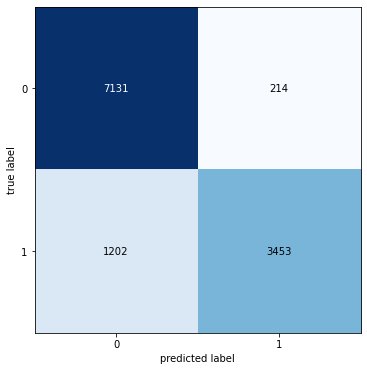

In [49]:
for j in range(predict_r2.shape[0]):
        if (predict_r1[j]<0.5):
            predict_r2[j]=0
        else:
            predict_r2[j]=1
cm_r = confusion_matrix(test_target, predict_r2)
fig, ax = plot_confusion_matrix(conf_mat=cm_r, figsize=(6, 6))

In [50]:
metrics.accuracy_score(test_target,predict_r2)

0.882

In [12]:
l2_norm = np.linalg.norm(ridge.coef_)

print("L2 norm of coefficients:", l2_norm)

L2 norm of coefficients: 22.0824809727579




Non-linear Model

In [20]:
from sklearn import svm



In [24]:
split=5
df_size=df.shape[0]
fold_size = df.shape[0]/split
coef_cv_svm=np.zeros((5,df_size))
for i in range(split):
    test_index = np.arange(i*fold_size, i*fold_size+fold_size,1)
    train_index = np.setdiff1d(np.arange(0,df.shape[0],1),test_index)
#.  debug
#   print(test_index)
#    print(train_index)
    train_raw = x.iloc[train_index]
    train_target_raw = y.iloc[train_index]
    test_raw = x.iloc[test_index]
    test_target_raw = y.iloc[test_index]
    #pipeline
    train = full_pipeline.fit_transform(train_raw)
    test = full_pipeline.transform(test_raw)
    train_target = train_target_raw.to_numpy()
    test_target = test_target_raw.to_numpy()
    svm_clf = svm.SVC()
    svm_clf.fit(train,train_target)
    predict_s1 = svm_clf.predict(test)
    predict_s2 = np.zeros(predict_s1.shape[0])
    for j in range(predict_s2.shape[0]):
        if (predict_s1[j]<0.5):
            predict_s2[j]=0
        else:
            predict_s2[j]=1
    #print(metrics.accuracy_score(test_target,predict2))
    #print(lin_clf.coef_.shape[0])
    #print(lin_clf.coef_)
    #new_array = np.array(lin_clf.coef_)
    #coef_cv_svm[i,:lin_clf.coef_.shape[0]]=np.array(svm_clf.coef_)
    print("In "+ str(i+1)  + " fold, the accuracy is "+ str(metrics.accuracy_score(test_target,predict_s2)))
    

In 1 fold, the accuracy is 0.87225
In 2 fold, the accuracy is 0.8705
In 3 fold, the accuracy is 0.8685
In 4 fold, the accuracy is 0.86925
In 5 fold, the accuracy is 0.87175


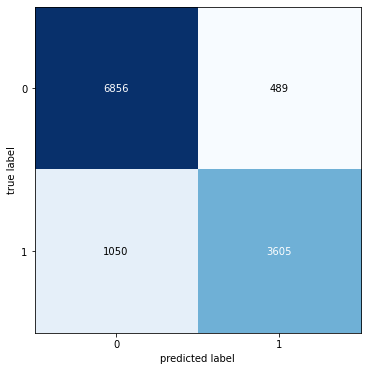

In [21]:
test_index = np.arange(i*fold_size, i*fold_size+fold_size,1)
train_index = np.setdiff1d(np.arange(0,df.shape[0],1),test_index)
train_raw = x.iloc[train_index]
train_target_raw = y.iloc[train_index]
test_raw = x.iloc[test_index]
test_target_raw = y.iloc[test_index]
#pipeline
train = full_pipeline.fit_transform(train_raw)
test = full_pipeline.transform(test_raw)
train_target = train_target_raw.to_numpy()
test_target = test_target_raw.to_numpy()
svm_clf = svm.SVC()
svm_clf.fit(train,train_target)
predict_s1 = svm_clf.predict(test)
predict_s2 = np.zeros(predict_s1.shape[0])
for j in range(predict_s2.shape[0]):
    if (predict_s1[j]<0.5):
        predict_s2[j]=0
    else:
        predict_s2[j]=1
cm_svm = confusion_matrix(test_target, predict_s2)
fig, ax = plot_confusion_matrix(conf_mat=cm_svm, figsize=(6, 6))

